###Aim
Encode a few simple stick figures that the layout algorithm is likely to display correctly. 

Generate a grammar and observe the derived samples. 

In [1]:
%matplotlib inline
#draw stick figures
import networkx as nx

/home/ikea3/.local/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/ikea3/.local/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


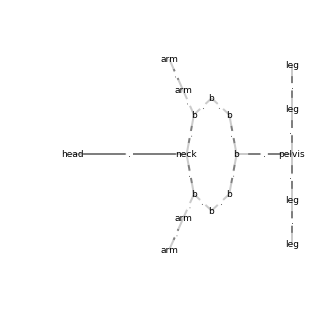

In [2]:
G=nx.Graph()
G.add_node(0, label='head')
G.add_node(1, label='neck')
G.add_node(11, label='b')
G.add_node(12, label='b')
G.add_node(13, label='b')
G.add_node(22, label='b')
G.add_node(23, label='b')
G.add_node(32, label='b')
G.add_node(33, label='b')
G.add_node(5, label='arm')
G.add_node(6, label='arm')
G.add_node(55, label='arm')
G.add_node(56, label='arm')
G.add_node(7, label='leg')
G.add_node(8, label='leg')
G.add_node(57, label='leg')
G.add_node(58, label='leg')
G.add_node(9, label='pelvis')
G.add_edge(0,1, label='.')
G.add_edge(1,22, label='.')
G.add_edge(1,23, label='.')
G.add_edge(9,11, label='.')
G.add_edge(11,12, label='.')
G.add_edge(11,13, label='.')
G.add_edge(12,32, label='.')
G.add_edge(13,33, label='.')
G.add_edge(22,32, label='.')
G.add_edge(23,33, label='.')
G.add_edge(9,7, label='.')
G.add_edge(9,8, label='.')
G.add_edge(22,5, label='.')
G.add_edge(23,6, label='.')
G.add_edge(5,55, label='.')
G.add_edge(6,56, label='.')
G.add_edge(7,57, label='.')
G.add_edge(8,58, label='.')


from eden.util import display
display.draw_graph(G, size=5, node_size=500, prog='circo')

g1 = G.copy()

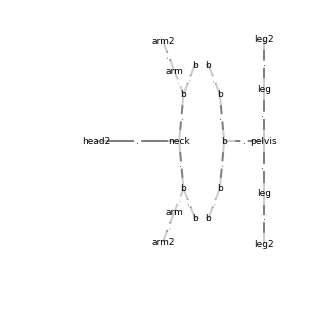

In [3]:
G=nx.Graph()
G.add_node(0, label='head2')
G.add_node(1, label='neck')
G.add_node(11, label='b')
G.add_node(12, label='b')
G.add_node(13, label='b')
G.add_node(22, label='b')
G.add_node(23, label='b')
G.add_node(32, label='b')
G.add_node(33, label='b')
G.add_node(42, label='b')
G.add_node(43, label='b')
G.add_node(5, label='arm')
G.add_node(6, label='arm')
G.add_node(55, label='arm2')
G.add_node(56, label='arm2')
G.add_node(7, label='leg')
G.add_node(8, label='leg')
G.add_node(57, label='leg2')
G.add_node(58, label='leg2')
G.add_node(9, label='pelvis')
G.add_edge(0,1, label='.')
G.add_edge(1,22, label='.')
G.add_edge(1,23, label='.')
G.add_edge(9,11, label='.')
G.add_edge(11,42, label='.')
G.add_edge(11,43, label='.')
G.add_edge(42,12, label='.')
G.add_edge(43,13, label='.')
G.add_edge(12,32, label='.')
G.add_edge(13,33, label='.')
G.add_edge(22,32, label='.')
G.add_edge(23,33, label='.')
G.add_edge(9,7, label='.')
G.add_edge(9,8, label='.')
G.add_edge(22,5, label='.')
G.add_edge(23,6, label='.')
G.add_edge(5,55, label='.')
G.add_edge(6,56, label='.')
G.add_edge(7,57, label='.')
G.add_edge(8,58, label='.')

from eden.util import display
display.draw_graph(G, size=5, node_size=500, prog='circo')

g2 = G.copy()

DEBUG:root.eden.util:
Classifier:
DEBUG:root.eden.util:SGDClassifier(alpha=0.000493890223536, average=False, class_weight=None,
       epsilon=0.1, eta0=0.449946429238, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=88, n_jobs=1,
       penalty='l1', power_t=0.415231904765, random_state=None,
       shuffle=True, verbose=0, warm_start=False)
DEBUG:root.eden.util:
Predictive performance:
DEBUG:root.eden.util:            accuracy: 1.000 +- 0.000
DEBUG:root.eden.util:           precision: 1.000 +- 0.000
DEBUG:root.eden.util:              recall: 1.000 +- 0.000
DEBUG:root.eden.util:                  f1: 1.000 +- 0.000
DEBUG:root.eden.util:   average_precision: 1.000 +- 0.000
DEBUG:root.eden.util:             roc_auc: 1.000 +- 0.000


interface: 64000768


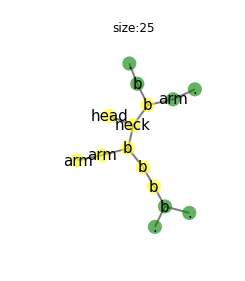

interface: 9195014


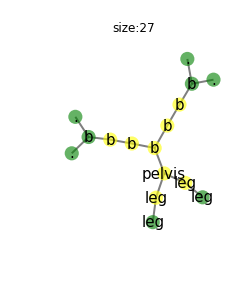

In [4]:
import sys
sys.path.append('..')
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
gr = [g2,g1,g1,g1,g1,g1]

sampler=gl.GraphLearnSampler(radius_list=[0,1,2],thickness_list=[1.5], complexity=3)
sampler.fit(gr,n_jobs=-1, core_interface_pair_remove_threshold=1, interface_remove_threshold=1)

myutils.draw_grammar(sampler.local_substitutable_graph_grammar.grammar,2)
#myutils.draw_grammar_stats(sampler.local_substitutable_graph_grammar.grammar)

DEBUG:root:feasibility- edge check failed, (interface twist phenomenon probably)


drawing problem:


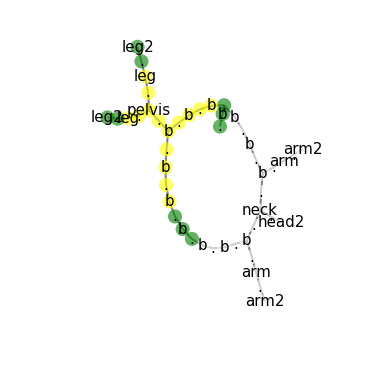

DEBUG:root:feasibility- edge check failed, (interface twist phenomenon probably)


drawing problem:


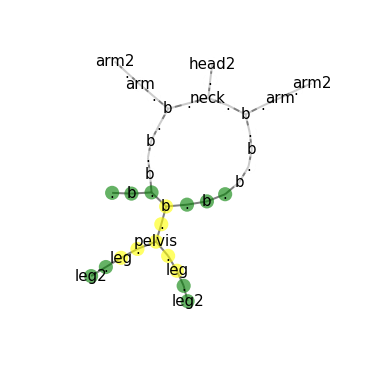

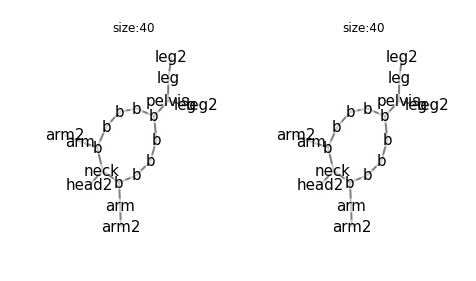

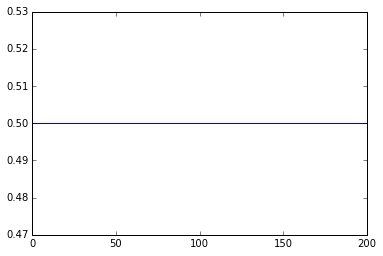

In [5]:
#sample
seed_graphs = [g2]
n_steps=200
graphs = sampler.sample(seed_graphs,
                        same_radius=False,
                        same_core_size=False,
                        sampling_interval=n_steps/10,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        annealing_factor=1)
#draw
history=[]
for  i, (result,info) in enumerate(graphs):
    history.append(info['score_history'])
    myutils.draw_many_graphs(info['graphs'])
    
import matplotlib.pyplot as plt
t = range(n_steps+1) 
for h in history: plt.plot(t, h)
plt.show()

###Question:
why does it not shrink the body?

Is it because there is no signal towards fewer body nodes? is it a problem of the normalization?

###Answer:
its kind of obvious :) 
